<div class="warning" style='padding:0.2em; margin:0em;
  background-color:#FBAAAA; color:#521919;
  border-left: solid #521919 4px; border-radius: 4px;'>

<p style='margin:1em; text-align:center'>
  <b>⚠ This notebook is under construction</b>
</p>

<p style='margin:1em;'>
This document is currently being worked on and is far from being complete / ready to use. And don't worry, there will be more Sage-related code in the end.
</p>

</div>

# **Fourier Transform in SageMath**
**_A project by Felix Lentze & Dominic Plein ([@Splience](https://youtube.com/@splience))_**

In this project, we will discuss what sound is, how to represent it mathematically & in a computer, and how to examine its frequency content using the Fourier Transform. The latter will be implemented in SageMath, a free open-source computer algebra system as superset of Python which bundles many great libraries like numpy, scipy, matplotlib, and more. With the help of filter matrices, the frequency spectrum of a sound can be manipulated. This is demonstrated with some sample sounds.

This projected is intended for educational purposes, i.e. we don't focus on performance of our code (for that, see the FFT algorithm implemented in system-level languages like Rust or C++). Basic knowledge of linear algebra as well as Python are required. The key points are explained next to the code. The reader is encouraged to experiment with the code and the provided sound samples.

Throughout your journey of exploring the amazing world of Fourier in this notebook, you might want to have the amazing book [Linear algebra, signal proceessing, and wavelets. A unified approach.](https://www.uio.no/studier/emner/matnat/math/nedlagte-emner/MAT-INF2360/v15/kompendium/) by Øyvind Ryan open next to you. When we reference a theorem/definition from this book, we refer to the January 21, 2015 Python edition.

<hr>

### **Import packages**

From the [Sage documentation](https://doc.sagemath.org/html/en/thematic_tutorials/numerical_sage/numerical_tools.html): <small>(highlights & line breaks by us)</small>

> Sage has many different components that may be useful for numerical analysis. In particular three packages deserve mention, they are numpy, SciPy, and cvxopt.
> - **Numpy** is an excellent package that provides fast array facilities to python. It includes some basic linear algebra routines, vectorized math routines, random number generators, etc. It supports a programming style similar to one would use in matlab and most matlab techniques have an analogue in numpy.
> - **SciPy** builds on numpy and provides many different packages for optimization, root finding, statistics, linear algebra, interpolation, FFT and dsp tools, etc.

In [71]:
# Packages that ship with SageMath
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

# Interact with Jupyter notebooks, e.g. show sliders
# See https://doc.sagemath.org/html/en/reference/repl/sage/repl/ipython_kernel/interact.html
from sage.repl.ipython_kernel.interact import interact

<hr>

### **Intro: What is sound really?**

We hear sounds every day - the chirping of birds, the rustling of leaves, the honking of cars, music, people talking. Physically speaking, sound is a pressure wave that propagates through a medium. Variations in air pressure near our ears cause our eardrums to vibrate, which our brain interprets as sound. The frequency of these pressure waves determines the pitch of the sound we hear. The amplitude of the pressure wave determines the loudness of the sound. As an example, consider the following sine wave and experiment with its parameters to see how they affect the sound:

$$\boxed{A(t) = \sin(2\pi f \cdot t + \varphi)}$$

$$\text{where }
f: \text{Frequency}, \: \varphi: \text{Phase}$$

**Watch out for your ears when playing the sound!**

In [127]:
from IPython.display import Audio

@interact
def sin_wave(f=slider(0, 10, 0.1, default=5),
        phi=slider(0,pi), A_0=slider(0,1,0.1, default=0.7)):
  # Plot the sine wave
  A(t) = A_0 * sin(2*pi*f*t + phi)
  show(plot(A(t), (t, 0, 2*pi), color="red", thickness=1.5),
  ymin=-1, ymax=1, figsize=(10, 4), axes_labels=[r'$t$', r'$A(t)$'])

  # Generate audio file
  SR = float(10000) # sample rate (samples per second, Hz)
  T = 1.0 # duration of sound (seconds)
  t_linspace = np.linspace(0, T, int(T*SR), endpoint=False)
  wave = A_0 * np.sin(2*np.pi*float(f*100)*t_linspace + phi)
  display(Audio(wave, rate=SR, normalize=False))

Interactive function <function sin_wave at 0x7f18609b0680> with 3 widgets
  f: TransformFloatSlider(value=5.0, description='f', max=10.0)
  phi: TransformFloatSlider(value=0.0, description='phi', max=3.141592653589793)
  A_0: TransformFloatSlider(value=0.7, description='A_0', max=1.0)

<hr>

**TODO: Work more intensely on the following sections.**

<hr>

### **Discrete Fourier Transform (DFT)**

Importing important libarys and implementing DFT function 

In [13]:
def dft(x):
  N = len(x)
  n = np.arange(N)
  k = n.reshape((N, 1))
  e = np.exp(-2j * np.pi * k * n / N)
  
  X = np.dot(e, x)
  
  return X

Importing .wav-file and printing length of the vector and sample rate

Vector containing air pressure differences at different (discrete) time steps
Sample rate says how many samples per second the .wav-file contains (normally 44100)

In [14]:
sample_rate, wav_data = wavfile.read('../data/sounds/sin02.wav')
print(len(wav_data))
print(wav_data)
print(sample_rate)

8821
[    0 22924  6672 ...   -30   -52     0]
44100


### **Fourier transformation**

performing DFT on wav-Vector. 
dft_result contains "frequencies" ( = periodic functions with given frequency) and quantity of frequence in measured signal

In [15]:
dft_result = np.fft.fft(wav_data)
print(dft_result)
n = len(dft_result)
n

[13419.        -6.17546903e-10j 13418.90599978+1.16276015e+00j
 13418.6245381 +2.29974578e+00j ... 13418.15755215-3.38415198e+00j
 13418.6245381 -2.29974578e+00j 13418.90599978-1.16276014e+00j]


8821

Determine occuring frequencies

In [16]:
n = len(wav_data)
print(n) 
freqs = np.fft.fftfreq(n)
print(freqs) 

8821
[ 0.          0.00011337  0.00022673 ... -0.0003401  -0.00022673
 -0.00011337]


### **Plot**

Creating plot with amplitude of frequencies

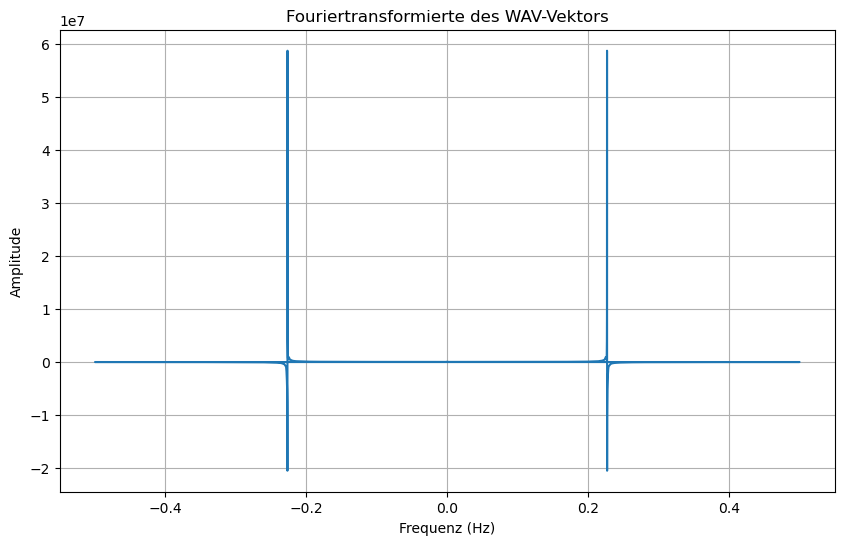

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.real(dft_result))  # Nur die positive Frequenzhälfte
plt.title('Fouriertransformierte des WAV-Vektors')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### **Inverse Discrete Fourier Transform (IDFT)**


In [18]:
def idft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return (1/N)*X

In [19]:
idft_result = idft(dft_result)
len(idft_result)
idft_result

array([-6.75238726e-12+1.15132491e-12j,  2.29240000e+04+9.50411967e-12j,
        6.67200000e+03+3.76045500e-12j, ...,
       -2.99999999e+01+3.15790419e-08j, -5.20000000e+01+2.52336755e-08j,
        1.10988388e-08+4.48204571e-09j])

### **Fix rounding issues**

In [20]:
idft_rounded = np.around(idft_result, 6) #6 -> ok, 7 -> not ok

if np.array_equal(wav_data, idft_rounded):
    print("ok")
else:
    print("not ok")

ok


### **`.wav` output**

In [21]:
wavfile.write('../data/sounds/output.wav', 44100, idft_rounded)

ValueError: Unsupported data type 'complex128'